<a href="https://colab.research.google.com/github/konduruchandra/Handwritten-Digits-Prediction/blob/main/PRCP_1002_Handwritten_Digits_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize input to [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten for classical ML models (784 features)
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


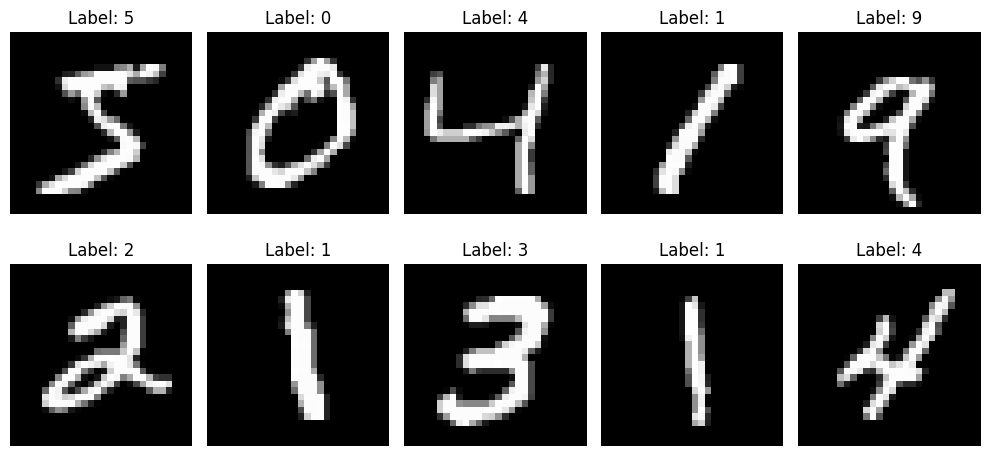

In [ ]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (Linear Kernel)": SVC(kernel='linear'),
    "SVM (RBF Kernel)": SVC(kernel='rbf'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

In [ ]:
results = {}

for name, model in models.items():
    model.fit(X_train_flat, y_train)
    predictions = model.predict(X_test_flat)
    acc = accuracy_score(y_test, predictions)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, predictions))


Logistic Regression Accuracy: 0.9259
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000


SVM (Linear Kernel) Accuracy: 0.9404
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.99      0.98      1135
  

In [ ]:
# One-hot encode the labels
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

# Define a simple feedforward neural network
dl_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

dl_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model
history = dl_model.fit(X_train, y_train_oh, epochs=5,
                       validation_data=(X_test, y_test_oh),
                       verbose=2)

# Evaluate
dl_test_loss, dl_test_acc = dl_model.evaluate(X_test, y_test_oh)
results["Deep Learning (Keras)"] = dl_test_acc
print(f"\nDeep Learning (Keras) Accuracy: {dl_test_acc:.4f}")

Epoch 1/5
1875/1875 - 5s - 2ms/step - accuracy: 0.9304 - loss: 0.2406 - val_accuracy: 0.9591 - val_loss: 0.1308
Epoch 2/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9701 - loss: 0.0997 - val_accuracy: 0.9704 - val_loss: 0.0916
Epoch 3/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9782 - loss: 0.0704 - val_accuracy: 0.9704 - val_loss: 0.0991
Epoch 4/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9827 - loss: 0.0540 - val_accuracy: 0.9782 - val_loss: 0.0737
Epoch 5/5
1875/1875 - 3s - 2ms/step - accuracy: 0.9871 - loss: 0.0407 - val_accuracy: 0.9797 - val_loss: 0.0751
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9759 - loss: 0.0837

Deep Learning (Keras) Accuracy: 0.9797



Model Comparison:
Logistic Regression: 92.59%
SVM (Linear Kernel): 94.04%
SVM (RBF Kernel): 97.92%
K-Nearest Neighbors: 97.05%
Random Forest: 97.03%
Deep Learning (Keras): 97.97%


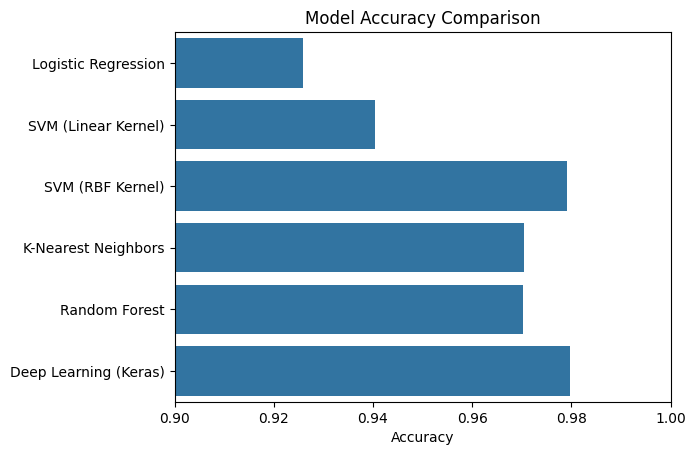

In [ ]:
# Compare model accuracies
print("\nModel Comparison:")
for model_name in results:
    print(f"{model_name}: {results[model_name]*100:.2f}%")

# Plot
sns.barplot(x=list(results.values()), y=list(results.keys()))
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.xlim(0.9, 1.0)
plt.show()

In [ ]:
best_model = max(results, key=results.get)
print(f"\nRecommended Model for Production: {best_model} with accuracy {results[best_model]*100:.2f}%")


Recommended Model for Production: Deep Learning (Keras) with accuracy 97.97%
